
**By the end of this tutorial, you will understand Python better by being able to use Python to:**

1. Check overall frequency of total messages on the group.

2. Check top 10 most active days of messaging.

3. Check top 10 active users in the group.

4. Fing out the ghosts/inactive members the in the group.

5. Check Top 10 Users Most Sent Media, Total Messages, Average Words Per Messsage.

7. Most active hours of the days.

3. Most active Days of the Month
9. Most active months of the year.
9. Create a WordCloud for the most used words.
6. Check top 10 most used emojis.

In [2]:
pip install emoji

     |████████████████████████████████| 174 kB 4.3 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=3fbe9c1a47da42d4d50d0aacd389c3f5bfd7e97bd977dc02cad0510d38502d76
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji


In [3]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS
import emoji
# import itertools 
from collections import Counter
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [19]:
def rawToDf(file, key):
    '''Converts raw .txt file into a Data Frame'''
    
    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%m/%d/%Y, %H:%M %p - ',
        '24hr' : '%m/%d/%Y, %H:%M - ',
        'custom': ''
    }
    
    with open(file, 'r', encoding='utf-8') as raw_data:
        # print(raw_data.read())
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split(split_formats[key], raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall(split_formats[key], raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
        
    # converting date-time pattern which is of type String to type datetime,
    # format is to be specified for the whole string where the placeholders are extracted by the method 
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("group_notification")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['message'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    return df


NOTE:

* Since WhatsApp texts are multi-line, you cannot just read the file line by line and get each message that you want. Instead, you need a way to identify if a line is a new message or part of an old message. You could use regular expressions.
* While reading each line, I split it based on a comma and take the first item returned from the split() function. If the line is a new message, the first item would be a valid date, and it will be appended as a new message to the list of messages. If it’s not, the message is part of the previous message, and hence, will be appended to the end of the previous message as one continuous message.

In [77]:
import pandas as pd
# df = pd.read_csv('chat.txt', header = None)
# df = rawToDf('chat.txt', '24hr')
df = pd.read_csv('chat.txt', sep="-", header=None)
df.columns = ["date_time", "Msg"]
df

,date_time,Msg
0,"9/15/21, 7:09 PM",+92 345 5410133: Asalam o Alaikum!!!
1,"9/15/21, 7:25 PM",+92 311 0096055: Insha Allah ❤️
2,"9/15/21, 8:24 PM",Ilyas BSCS: Ok sir
3,"10/7/21, 4:22 PM",+92 316 8013441: <Media omitted>
4,"10/7/21, 4:22 PM",+92 316 8013441: Sir da online d ka physical🤔
...,...,...
131,"10/22/21, 8:20 PM",+92 311 0096055: V net ke shta 🤣🤣🤣
132,"10/22/21, 8:20 PM",+92 311 9221282: 😂😂😂
133,"10/22/21, 8:21 PM",+92 311 9221282: @923085665704 🤔
134,"10/23/21, 4:33 PM",Shahan BSCS: 😂😂😂


In [78]:
type(df.Msg)

pandas.core.series.Series

In [79]:
df.head(4)

,date_time,Msg
0,"9/15/21, 7:09 PM",+92 345 5410133: Asalam o Alaikum!!!
1,"9/15/21, 7:25 PM",+92 311 0096055: Insha Allah ❤️
2,"9/15/21, 8:24 PM",Ilyas BSCS: Ok sir
3,"10/7/21, 4:22 PM",+92 316 8013441: <Media omitted>


In [80]:
# df[['Date','Time']] = df.a.str.split(",",expand=True)
df[['Sender', 'Mess']] = df.Msg.str.split(": ", expand=True)

In [81]:
# df.drop('a', axis=1, inplace=True)
df.drop('Msg', axis=1, inplace=True)
df.head(5)

,date_time,Sender,Mess
0,"9/15/21, 7:09 PM",+92 345 5410133,Asalam o Alaikum!!!
1,"9/15/21, 7:25 PM",+92 311 0096055,Insha Allah ❤️
2,"9/15/21, 8:24 PM",Ilyas BSCS,Ok sir
3,"10/7/21, 4:22 PM",+92 316 8013441,<Media omitted>
4,"10/7/21, 4:22 PM",+92 316 8013441,Sir da online d ka physical🤔


In [82]:

df.sample(10)

,date_time,Sender,Mess
13,"10/7/21, 7:30 PM",+92 344 9301829,zalima study kawa....
33,"10/16/21, 3:03 PM",Ilyas BSCS,Good morning 😎
56,"10/19/21, 2:54 PM",+92 344 1998058,<Media omitted>
53,"10/19/21, 2:29 PM",+92 349 7432637,This message was deleted
75,"10/19/21, 3:24 PM",+92 311 0096055,<Media omitted>
122,"10/19/21, 8:19 PM",+92 316 0955054,Sir g taso chi rata msg reply kari wa agha khu...
125,"10/19/21, 9:23 PM",+92 316 0955054,Kam di chi sir la na warzi nu mung la ba sa razi
126,"10/19/21, 9:24 PM",Shahan BSCS,Ta hu pohe we yar🤪🤪🤪
104,"10/19/21, 5:16 PM",Said ahmad bsc,<Media omitted>
27,"10/15/21, 5:01 PM",+92 345 5410133,This message was deleted


In [73]:
df.Sender.unique()

array([' +92 345 5410133', ' +92 311 0096055', ' Ilyas BSCS',
       ' +92 316 8013441', ' +92 316 0955054', ' +92 344 9301829',
       ' A.Hassan', ' Asad BSCS', ' Shahan BSCS', ' +92 315 5052848',
       ' Imad BS CS', ' Noman BSCS', ' +92 349 7432637',
       ' +92 344 1998058', ' Said ahmad bsc', ' +92 311 5081581',
       ' Gul Aman. BSCS', ' Ibrahim BSCS', ' +92 306 3855716',
       ' +92 310 9512348', ' +92 311 9221282'], dtype=object)

## **Adding Day, Month, Year, and Date for further analysis**

In [75]:
df.columns

Index(['Date', 'Time', 'Sender', 'Mess'], dtype='object')

In [86]:
df['date_time'] =  pd.to_datetime(df['date_time'], infer_datetime_format=True)

In [87]:
df['day'] = df['date_time'].dt.strftime('%a')
df['month'] = df['date_time'].dt.strftime('%b')
df['year'] = df['date_time'].dt.year
df['date'] = df['date_time'].apply(lambda x: x.date())
df

,date_time,Sender,Mess,day,month,year,date
0,2021-09-15 19:09:00,+92 345 5410133,Asalam o Alaikum!!!,Wed,Sep,2021,2021-09-15
1,2021-09-15 19:25:00,+92 311 0096055,Insha Allah ❤️,Wed,Sep,2021,2021-09-15
2,2021-09-15 20:24:00,Ilyas BSCS,Ok sir,Wed,Sep,2021,2021-09-15
3,2021-10-07 16:22:00,+92 316 8013441,<Media omitted>,Thu,Oct,2021,2021-10-07
4,2021-10-07 16:22:00,+92 316 8013441,Sir da online d ka physical🤔,Thu,Oct,2021,2021-10-07
...,...,...,...,...,...,...,...
131,2021-10-22 20:20:00,+92 311 0096055,V net ke shta 🤣🤣🤣,Fri,Oct,2021,2021-10-22
132,2021-10-22 20:20:00,+92 311 9221282,😂😂😂,Fri,Oct,2021,2021-10-22
133,2021-10-22 20:21:00,+92 311 9221282,@923085665704 🤔,Fri,Oct,2021,2021-10-22
134,2021-10-23 16:33:00,Shahan BSCS,😂😂😂,Sat,Oct,2021,2021-10-23


##**Check overall frequency of total messages on the group.**

Over here we will use the date and the count of messages to understand the overall trend of messaging in the group.

In [88]:
new_df = df.copy()      # let's use a copy of our dataset for this analysis.
new_df['message_count'] = new_df.shape[0]*[1]      # adding extra helper column --> message_count.
new_df

,date_time,Sender,Mess,day,month,year,date,message_count
0,2021-09-15 19:09:00,+92 345 5410133,Asalam o Alaikum!!!,Wed,Sep,2021,2021-09-15,1
1,2021-09-15 19:25:00,+92 311 0096055,Insha Allah ❤️,Wed,Sep,2021,2021-09-15,1
2,2021-09-15 20:24:00,Ilyas BSCS,Ok sir,Wed,Sep,2021,2021-09-15,1
3,2021-10-07 16:22:00,+92 316 8013441,<Media omitted>,Thu,Oct,2021,2021-10-07,1
4,2021-10-07 16:22:00,+92 316 8013441,Sir da online d ka physical🤔,Thu,Oct,2021,2021-10-07,1
...,...,...,...,...,...,...,...,...
131,2021-10-22 20:20:00,+92 311 0096055,V net ke shta 🤣🤣🤣,Fri,Oct,2021,2021-10-22,1
132,2021-10-22 20:20:00,+92 311 9221282,😂😂😂,Fri,Oct,2021,2021-10-22,1
133,2021-10-22 20:21:00,+92 311 9221282,@923085665704 🤔,Fri,Oct,2021,2021-10-22,1
134,2021-10-23 16:33:00,Shahan BSCS,😂😂😂,Sat,Oct,2021,2021-10-23,1


In [89]:
# grouping by date; since plot is of frequency of messages --> no. of messages / day.
new_df = new_df.groupby('date').sum().reset_index()
new_df

,date,year,message_count
0,2021-09-15,6063,3
1,2021-10-07,46483,23
2,2021-10-15,14147,7
3,2021-10-16,14147,7
4,2021-10-18,20210,10
5,2021-10-19,157638,78
6,2021-10-22,12126,6
7,2021-10-23,2021,1
8,2022-01-02,2022,1


In [90]:
 # let's drop the year since we will need only the date and message count for our analysis
new_df.drop(columns='year', inplace=True)        
new_df

,date,message_count
0,2021-09-15,3
1,2021-10-07,23
2,2021-10-15,7
3,2021-10-16,7
4,2021-10-18,10
5,2021-10-19,78
6,2021-10-22,6
7,2021-10-23,1
8,2022-01-02,1


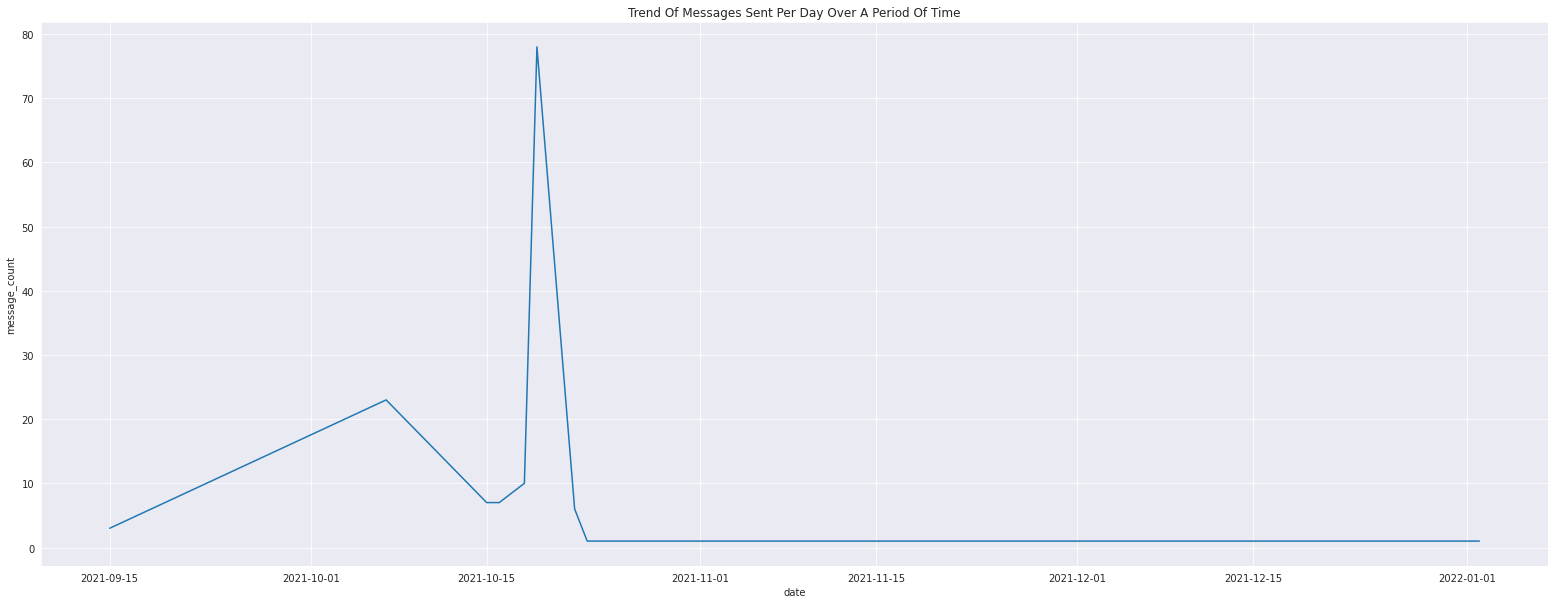

In [91]:
# Improving Default Styles using Seaborn
sns.set_style("darkgrid")

# For better readablity;
import matplotlib
plt.figure(figsize = (27, 10))     # Same as ``


plt.title('Trend Of Messages Sent Per Day Over A Period Of Time');
sns.lineplot(new_df.date, new_df.message_count);   

##**Check top 10 most active days of messaging.**

In [92]:
# Sort values according to the number of messages per day.
top10days = new_df.sort_values(by="message_count", ascending=False).head(10)

# reset index in order.
top10days.reset_index(inplace=True)           

# dropping original indices.
top10days.drop(columns="index", inplace=True) 
top10days

,date,message_count
0,2021-10-19,78
1,2021-10-07,23
2,2021-10-18,10
3,2021-10-15,7
4,2021-10-16,7
5,2021-10-22,6
6,2021-09-15,3
7,2021-10-23,1
8,2022-01-02,1


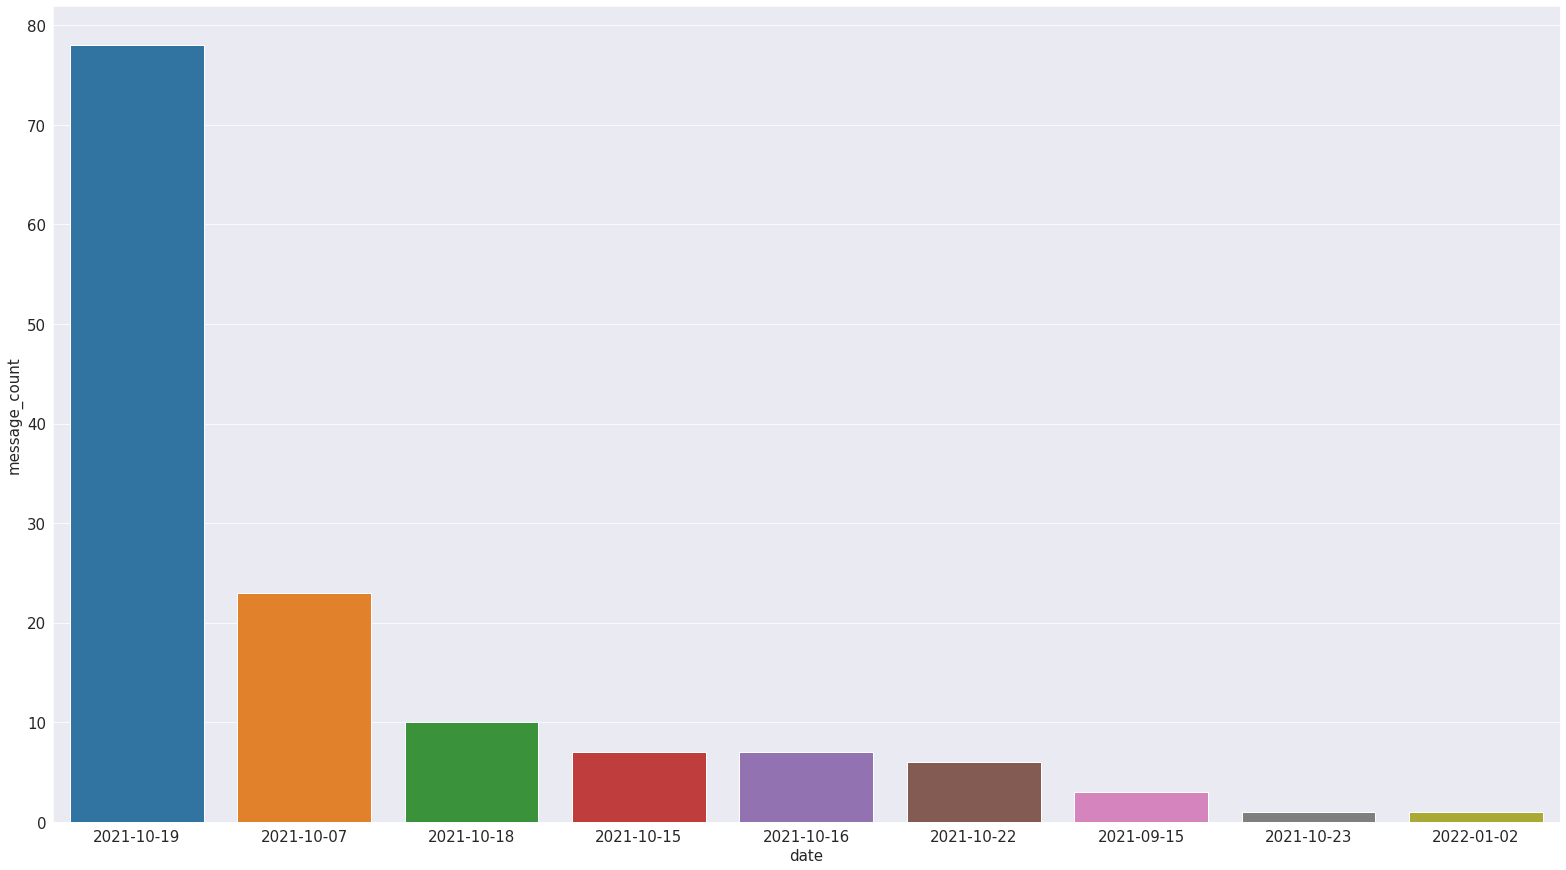

In [93]:
# Improving Default Styles using Seaborn
sns.set_style("darkgrid")

# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 15
plt.figure(figsize = (27, 15)) 

# A bar plot for top 10 days
sns.barplot(top10days.date, top10days.message_count);

# Saving the plots
plt.savefig('top10_days.svg', format = 'svg')

##**Check top 10 active users in the group.**

In [95]:
df2 = df.copy()    
df2 = df2[df2.Sender != "group_notification"]
top10df = df2.groupby("Sender")["Mess"].count().sort_values(ascending=False)

# Final Data Frame
top10df = top10df.head(10).reset_index()
top10df

,Sender,Mess
0,+92 345 5410133,24
1,+92 316 8013441,18
2,Said ahmad bsc,17
3,Shahan BSCS,12
4,+92 344 9301829,11
5,Ilyas BSCS,10
6,+92 316 0955054,8
7,+92 344 1998058,6
8,A.Hassan,5
9,Imad BS CS,4


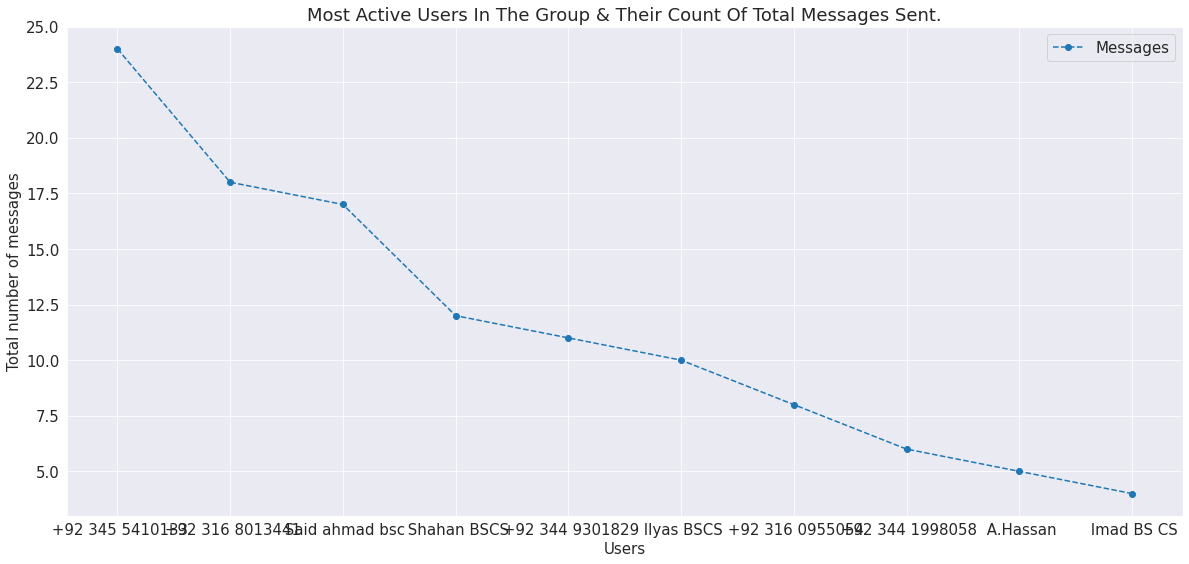

In [96]:
# Increasing the figure size
matplotlib.rcParams['font.size'] = 15
plt.figure(figsize=(20, 9))

plt.plot(top10df.Sender, top10df.Mess, marker='o', ls='--')

# Labels and Title 
plt.xlabel('Users')
plt.ylabel('Total number of messages')

plt.title("Most Active Users In The Group & Their Count Of Total Messages Sent.")
plt.legend(['Messages']);

We can also plot both Bar Graph and Line Chart for better view.


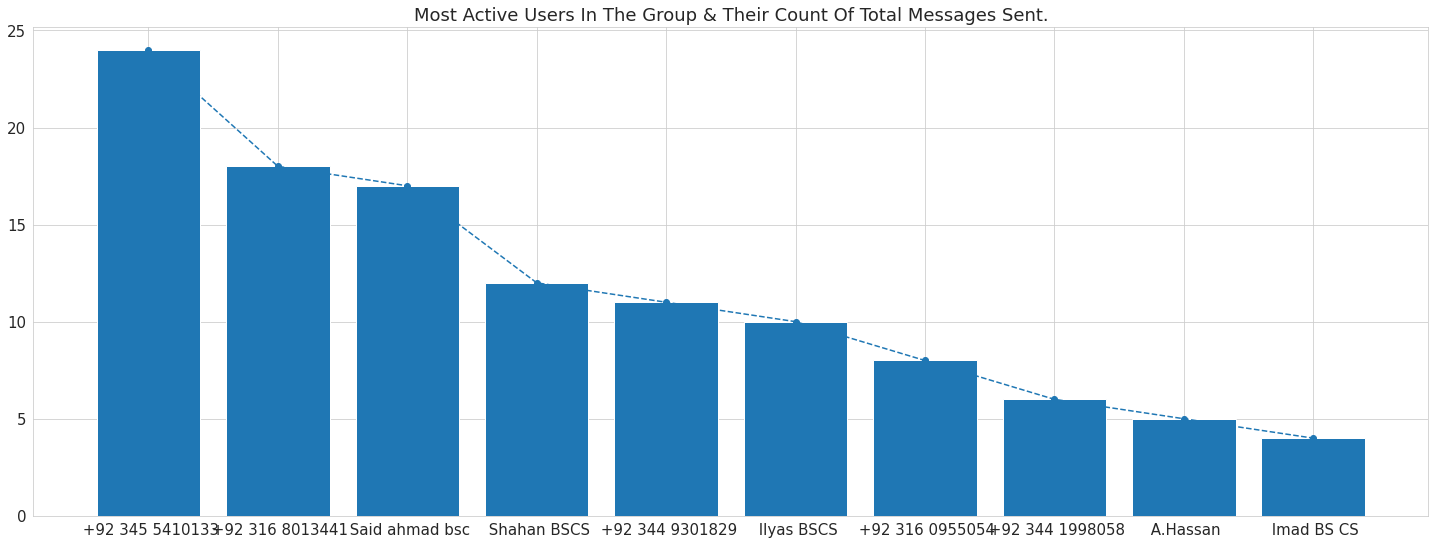

In [98]:
# Improving Default Styles using Seaborn
sns.set_style("whitegrid")

# Increasing the figure size
matplotlib.rcParams['font.size'] = 15
plt.figure(figsize=(25, 9))


plt.title("Most Active Users In The Group & Their Count Of Total Messages Sent.")

plt.bar(top10df.Sender, top10df.Mess)   # basic bar chart
plt.plot(top10df.Sender, top10df.Mess, marker='o', ls='--')  # line chart
plt.show()

<br>

##**Fing out the ghosts/inactive members the in the group.**

We can also find out those who are just spectators in the group. They just read messages and pass by.

In [99]:
df2 = df.copy()    
df2 = df2[df2.Sender != "group_notification"]
last10df = df2.groupby("Sender")["Mess"].count().sort_values(ascending=True) #either change this or use the tail function instead of head below

# Final Data Frame
last10df = last10df.head(10).reset_index() #if you did not set 'ascending=True', then use tail(10) over here instead of head(10)
last10df

,Sender,Mess
0,+92 306 3855716,1
1,+92 310 9512348,1
2,+92 311 5081581,1
3,+92 315 5052848,1
4,Ibrahim BSCS,1
5,+92 349 7432637,1
6,Gul Aman. BSCS,2
7,Noman BSCS,2
8,+92 311 9221282,3
9,+92 311 0096055,4


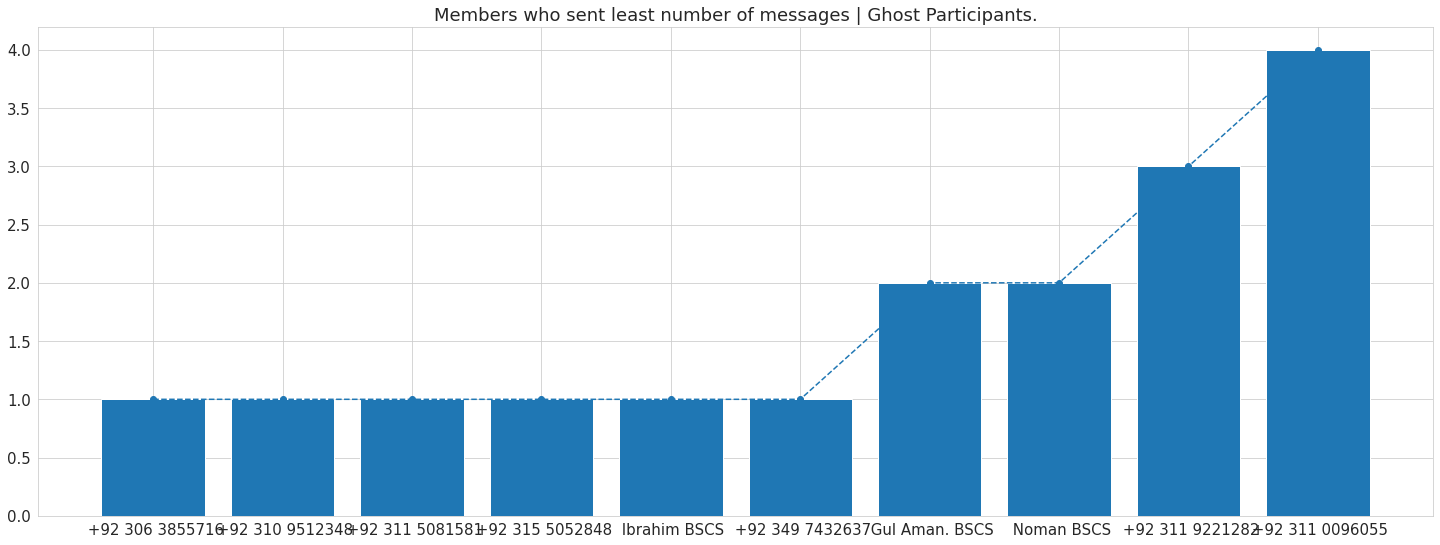

In [100]:
# Improving Default Styles using Seaborn
sns.set_style("whitegrid")

# Increasing the figure size

plt.figure(figsize=(25, 9))

plt.title("Members who sent least number of messages | Ghost Participants.")

plt.bar(last10df.Sender, last10df.Mess)   # basic bar chart
plt.plot(last10df.Sender, last10df.Mess, marker='o', ls='--')  # line chart
plt.show()

In [101]:
df[df.Mess == '<Media omitted> ']

,date_time,Sender,Mess,day,month,year,date


##**Check Top 10 Users Most Sent Media, Total Messages, Average Words Per Messsage .**

In [103]:
# Using `groupby`, `count` and `sort_values` attributes.
top10media = df[df.Mess == '<Media omitted> '].groupby('Sender').count().sort_values(by="Mess", ascending = False).head(10)

# Dropping unused column;
top10media.drop(columns=['date_time', 'day', 'month', 'year', 'date'], inplace=True)

# Renaming column name for visualization;
top10media.rename(columns={"Mess": "media_sent"}, inplace=True)

# resetting index;
top10media.reset_index(inplace=True)

top10media


,Sender,media_sent


##Most active **hours**

In [105]:
df3 = df.copy()
df3['message_count'] = [1] * df.shape[0]    # new column that will keep count.
 
df3['hour'] = df3['date_time'].apply(lambda x: x.hour)
 
grouped_by_time = df3.groupby('hour').sum().reset_index().sort_values(by = 'hour')

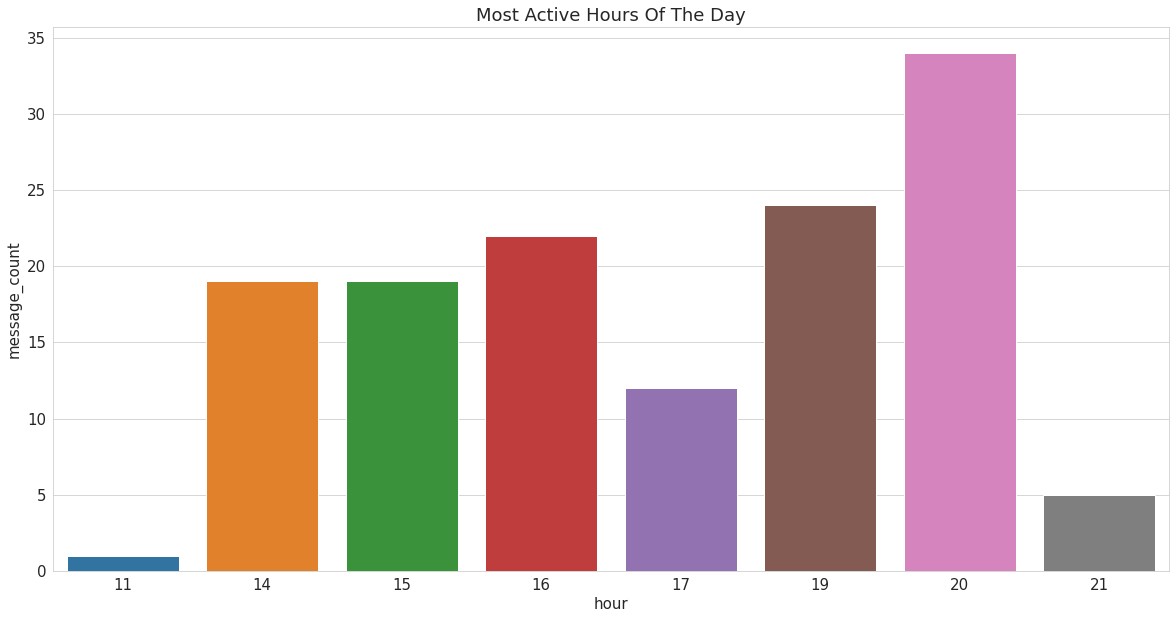

In [106]:
# Better Readablity
import matplotlib
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (20, 10)

# Beautifying Default Styles using Seaborn
# sns.set_style("darkgrid")

# PLOT: grouped by hour
sns.barplot(grouped_by_time.hour, grouped_by_time.message_count)
plt.title('Most Active Hours Of The Day');

##Most active **Days**

In [107]:
grouped_by_day = df3.groupby('day').sum().reset_index()[['day', 'message_count']]

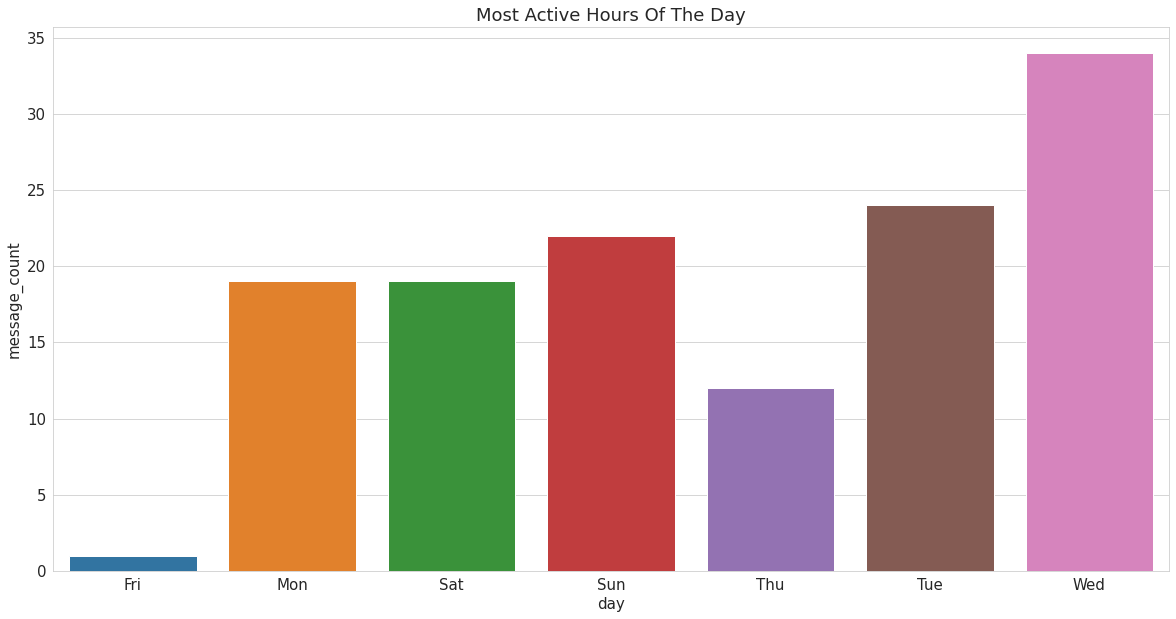

In [108]:
# Better Readablity
import matplotlib
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (20, 10)

# PLOT: grouped by hour
sns.barplot(grouped_by_day.day, grouped_by_time.message_count)
plt.title('Most Active Hours Of The Day');

##Most active **Months**

In [109]:
grouped_by_month = df3.groupby('month').sum().reset_index()[['month', 'message_count']]

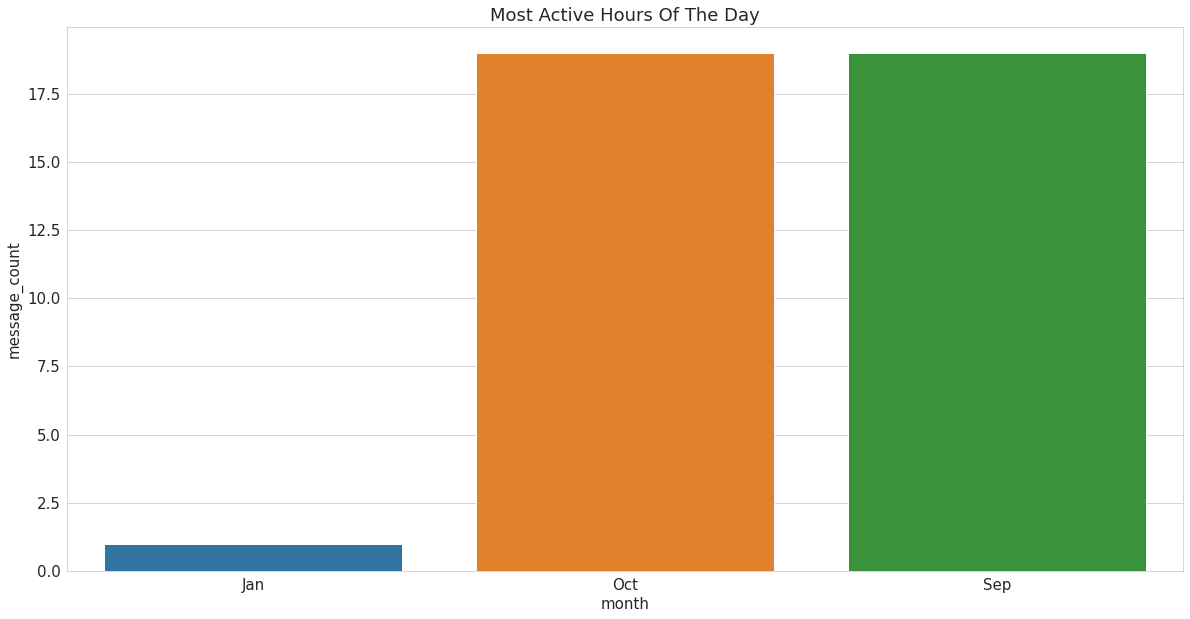

In [110]:
# Better Readablity
import matplotlib
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (20, 10)

# PLOT: grouped by hour
sns.barplot(grouped_by_month.month, grouped_by_time.message_count)
plt.title('Most Active Hours Of The Day');

##**Create a WordCloud for the most used words.**

In [112]:

comment_words = ' '

# stopwords --> Words to be avoided while forming the WordCloud,
# removed group_notifications like 'joined', 'deleted';
# removed really common words like "yeah" and "okay".
# stopwords = STOPWORDS.update(['group', 'link', 'invite', 'joined','join', 'message', 'deleted', 'yeah', 'hai', 'yes', 'okay', 'ok', 'will', 'use', 'using', 'one', 'know', 'guy', 'group', 'media', 'omitted'])


# iterate through the DataFrame.
for val in df3.Mess.values:
    
    # typecaste each val to string.
    val = str(val) 
    
    # split the value.
    tokens = val.split() 
    
    # Converts each token into lowercase.
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='white',  
                min_font_size = 8).generate(comment_words)

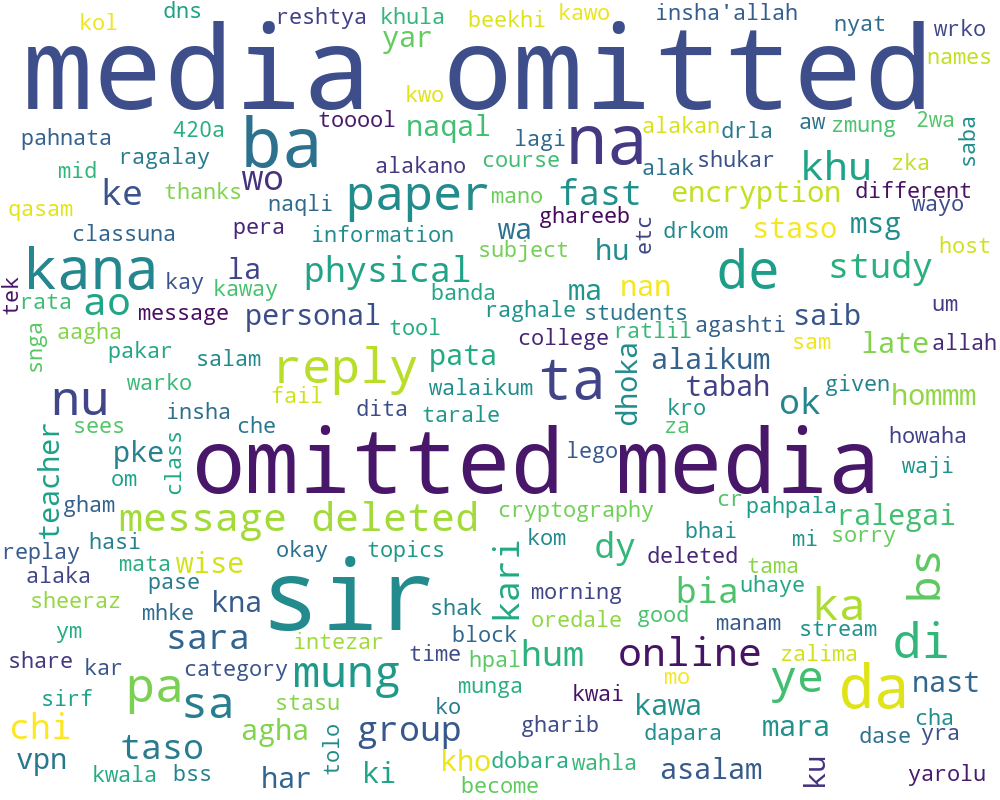

In [113]:
wordcloud.to_image()